In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [52]:
df = pd.read_csv("ackley.csv")
# Display the first few rows of the dataframe
df.head()
df.shape

(10000, 11)

In [33]:
# descriptive statistics of the dataset
descriptive_stats = df.describe()
descriptive_stats

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.246737,0.194345,-0.212179,0.091709,-0.113037,-0.289436,-0.072466,0.288168,0.088175,-0.329561,21.093922
std,18.422597,18.459066,18.501473,18.497636,18.353347,18.426648,18.466231,18.475776,18.313254,18.370685,0.443625
min,-31.998957,-31.999446,-31.997370,-31.998921,-31.994315,-31.993703,-31.997380,-31.999925,-31.977135,-31.996274,15.891882
25%,-16.409473,-15.866587,-16.209381,-15.684966,-15.969040,-16.337168,-15.973638,-15.626271,-15.806376,-16.350410,20.890246
50%,-0.274555,0.266674,-0.517385,0.292627,-0.211024,-0.193608,-0.284368,0.404971,0.214544,-0.588815,21.167998
75%,15.604755,16.202207,15.987048,16.046735,15.725329,15.290637,15.792619,16.351869,15.843326,15.616011,21.389358
max,31.998520,31.999030,31.999628,31.999926,31.992917,31.966631,31.997653,31.999816,31.981650,31.996992,22.029354


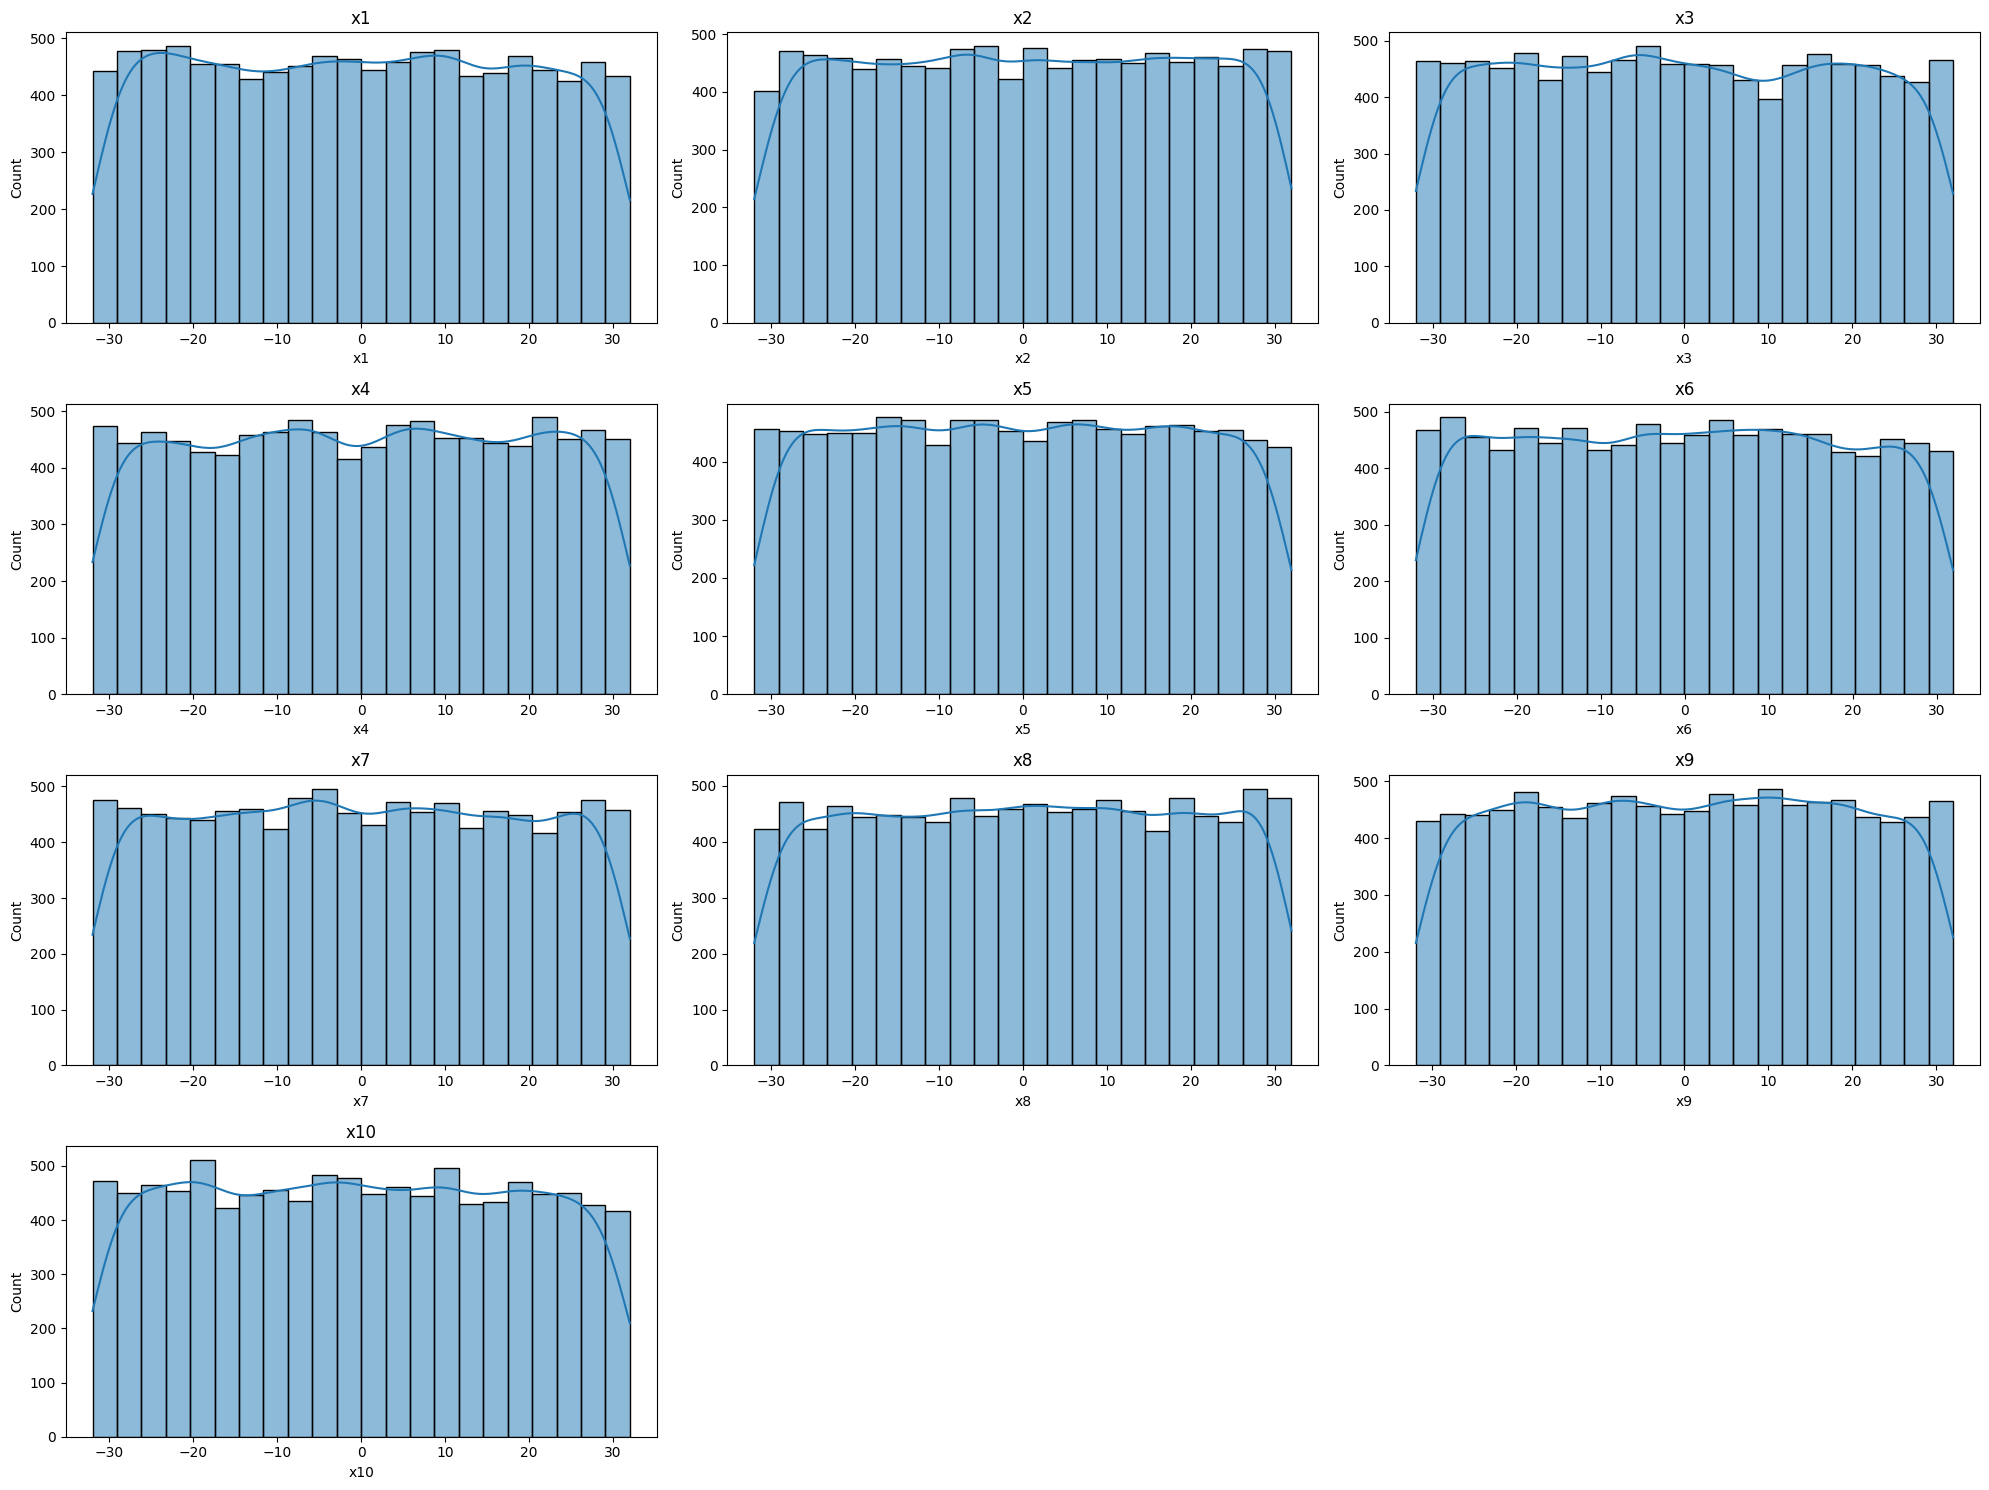

In [34]:
plt.figure(figsize=(20, 15))

# plot histogrames for each feature
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [35]:
# Calculating the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

              x1        x2        x3        x4        x5        x6        x7  \
x1      1.000000  0.006328  0.013317  0.003474  0.004215 -0.006732  0.010531   
x2      0.006328  1.000000 -0.013735 -0.000048 -0.004435 -0.006860  0.001238   
x3      0.013317 -0.013735  1.000000  0.000526 -0.002017  0.009061  0.005190   
x4      0.003474 -0.000048  0.000526  1.000000 -0.004372 -0.012073  0.005225   
x5      0.004215 -0.004435 -0.002017 -0.004372  1.000000  0.012417 -0.008565   
x6     -0.006732 -0.006860  0.009061 -0.012073  0.012417  1.000000 -0.003920   
x7      0.010531  0.001238  0.005190  0.005225 -0.008565 -0.003920  1.000000   
x8      0.004697  0.012697  0.012857 -0.011340  0.002382  0.000049  0.007666   
x9     -0.001356 -0.007259 -0.018451 -0.000213 -0.010927 -0.004040  0.012815   
x10     0.013981  0.013448  0.014971 -0.000544  0.017420 -0.023642  0.005806   
target -0.016441  0.002556  0.006403 -0.008828  0.001021 -0.009498  0.011865   

              x8        x9       x10   

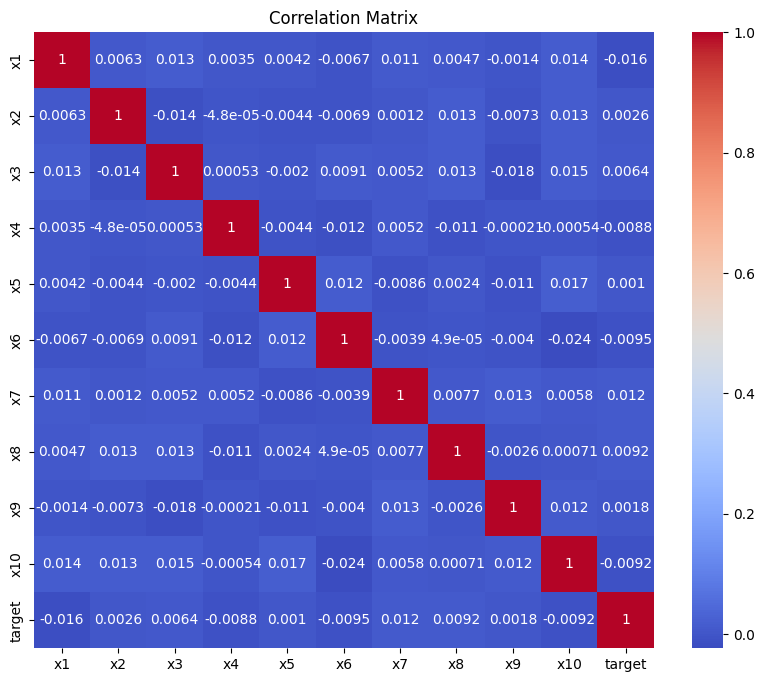

In [36]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Number of nodes in each layer
input_nodes = 10
hidden_nodes = 10
output_nodes = 10

# Defining the encoder part
input_layer = Input(shape=(input_nodes,))

hidden_layer = Dense(hidden_nodes, activation='relu')(input_layer)

# Defining the decoder part
output_layer = Dense(output_nodes, activation='sigmoid')(hidden_layer)

# Building the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder model
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 220 (880.00 Byte)
Trainable params: 220 (880.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
fea_space = df.drop('target', axis=1)
# Standardizing the features
df_scaled = StandardScaler().fit_transform(fea_space)

In [42]:
# Split the DataFrame into training and testing sets if needed
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)
print(X_train.shape)  # Should output (number_of_samples, 10)
print(X_test.shape)   # Should also output (number_of_samples, 10)

(8000, 10)
(2000, 10)


In [43]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
32/32 [==============================] - 1s 5ms/step - loss: 1.2748 - val_loss: 1.2485
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 1.2200 - val_loss: 1.1956
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 1.1697 - val_loss: 1.1469
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1231 - val_loss: 1.1016
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0793 - val_loss: 1.0593
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 1.0382 - val_loss: 1.0197
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9999 - val_loss: 0.9834
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9651 - val_loss: 0.9510
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9342 - val_loss: 0.9223
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.9069 - val_loss: 0.8971
Epoch 11/50
32/32 [

In [51]:
output_nodes = autoencoder.predict(X_test)
# Convert the array to a DataFrame
output_nodes_df = pd.DataFrame(output_nodes)
output_nodes_df.shape

# # Save to CSV
# output_nodes_df.to_csv('ackley_output_nodes.csv', index=False)

63/63 [==============================] - 0s 732us/step


(2000, 10)

In [48]:
# This model maps an input to its encoded (bottleneck) representation
encoder = Model(input_layer, hidden_layer)
compressed_data = encoder.predict(X_test)

63/63 [==============================] - 0s 684us/step


In [49]:
compressed_data.shape

(2000, 10)